## This is a NLP try/approach

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])

amazon_reviews.describe()

/var/folders/k9/89sz9rmn25s78pr1yz7ytdz40000gn/T/ipykernel_90815/1549001243.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [3]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df3 = random_select(amazon_reviews, 400, 3, 'reviews.rating')
df4 = random_select(amazon_reviews, 350, 4, 'reviews.rating')
df5 = random_select(amazon_reviews, 1000, 5, 'reviews.rating')
df12 = amazon_reviews[amazon_reviews['reviews.rating'].isin([1, 2])]

In [4]:
amazon = pd.concat([df12, df3, df4, df5], ignore_index=True)
amazon.describe()

def label(r):
    if r >= 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)

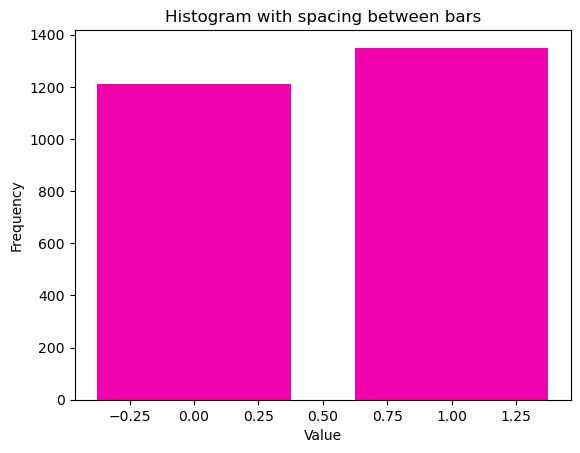

In [5]:
data = amazon['label']
min_bin = - 0.5
max_bin = 1.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#f200ad')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

### Relevant libraries:

In [6]:
import nltk
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/martateodoratrales/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/martateodoratrales/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/martateodoratrales/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martateodoratrales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/martateodoratrales/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Let us understand how this works:

In [7]:
example = amazon['reviews.text'][11]
example

'This is not a bad product. Amazon offers greats products but this tablet was missing features even for a basic tablet. The lack of google chrome compatibility made this tablet not right for me.'

In [8]:
tokens = nltk.word_tokenize(example)
tokens

['This',
 'is',
 'not',
 'a',
 'bad',
 'product',
 '.',
 'Amazon',
 'offers',
 'greats',
 'products',
 'but',
 'this',
 'tablet',
 'was',
 'missing',
 'features',
 'even',
 'for',
 'a',
 'basic',
 'tablet',
 '.',
 'The',
 'lack',
 'of',
 'google',
 'chrome',
 'compatibility',
 'made',
 'this',
 'tablet',
 'not',
 'right',
 'for',
 'me',
 '.']

In [9]:
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('bad', 'JJ'),
 ('product', 'NN'),
 ('.', '.'),
 ('Amazon', 'NNP'),
 ('offers', 'VBZ'),
 ('greats', 'NNS'),
 ('products', 'NNS'),
 ('but', 'CC'),
 ('this', 'DT'),
 ('tablet', 'NN'),
 ('was', 'VBD'),
 ('missing', 'VBG'),
 ('features', 'NNS'),
 ('even', 'RB'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('basic', 'JJ'),
 ('tablet', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('google', 'NN'),
 ('chrome', 'NN'),
 ('compatibility', 'NN'),
 ('made', 'VBD'),
 ('this', 'DT'),
 ('tablet', 'NN'),
 ('not', 'RB'),
 ('right', 'RB'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('.', '.')]

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  not/RB
  a/DT
  bad/JJ
  product/NN
  ./.
  (PERSON Amazon/NNP)
  offers/VBZ
  greats/NNS
  products/NNS
  but/CC
  this/DT
  tablet/NN
  was/VBD
  missing/VBG
  features/NNS
  even/RB
  for/IN
  a/DT
  basic/JJ
  tablet/NN
  ./.
  The/DT
  lack/NN
  of/IN
  google/NN
  chrome/NN
  compatibility/NN
  made/VBD
  this/DT
  tablet/NN
  not/RB
  right/RB
  for/IN
  me/PRP
  ./.)


## Model VADER

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
res = {}

for i, row in tqdm(amazon.iterrows(), total = len(amazon)):
    text = row['reviews.text']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2562 [00:00<?, ?it/s]

In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(amazon, how = 'left')
vaders

,id,neg,neu,pos,compound,name,asins,brand,categories,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,label
0,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,2.0,http://reviews.bestbuy.com/3545/5620406/review...,Didn't have some of the features I was looking...,Wasn't for me,NaN,NaN,Mark,0
1,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,NaN,NaN,Brandon,0
2,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this tablet for my 4 year old daughte...,Ended up returning,NaN,NaN,Mijenx,0
3,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,Didn't want to go to the sites amazon wanted m...,returned item,NaN,NaN,turtle,0
4,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,2.0,http://reviews.bestbuy.com/3545/5620406/review...,Not a good product short battery life i can on...,short life,NaN,NaN,notonfire1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,AVpftoij1cnluZ0-p5n2,0.000,0.621,0.379,0.7264,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B00IOYAM4I,Amazon,"Computers & Tablets,E-Readers & Accessories,eB...","amazonkindlevoyage4gbwifi3gblack/9301112,amazo...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/9301112/review...,Great e reader. Preffered the brighter display...,Works well,NaN,NaN,navinjo,1
2558,AVpftoij1cnluZ0-p5n2,0.000,0.621,0.379,0.7264,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B00IOYAM4I,Amazon,"Computers & Tablets,E-Readers & Accessories,eB...","amazonkindlevoyage4gbwifi3gblack/9301112,amazo...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/9301112/review...,Previous owner of an older kindle. Love the to...,Great product,NaN,NaN,Reviewer,1
2559,AVpftoij1cnluZ0-p5n2,0.000,0.621,0.379,0.7264,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B00IOYAM4I,Amazon,"Computers & Tablets,E-Readers & Accessories,eB...","amazonkindlevoyage4gbwifi3gblack/9301112,amazo...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/9301112/review...,"Very easy on the eyes. Easy to carry, fits in ...",great read,NaN,NaN,Rangerider,1
2560,AVqkIhxunnc1JgDc3kg_,0.000,0.879,0.121,0.6114,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018T075DC,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...","amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620410/review...,Bought it for my wifes Yoga Training Course.So...,Great Pad,NaN,NaN,AmirFriedman85,1


Text(0.5, 1.0, 'Scores')

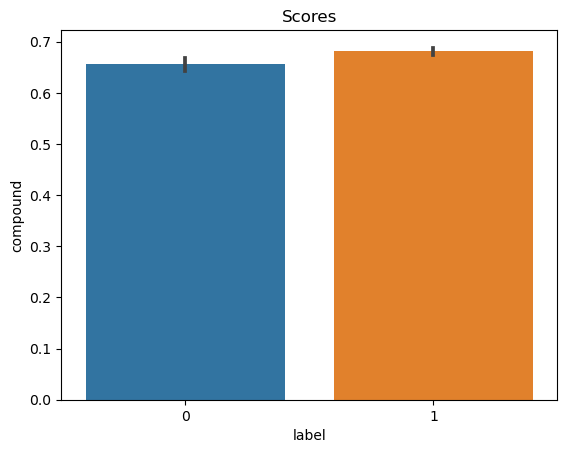

In [14]:
ax = sns.barplot(data = vaders, x = 'label', y = 'compound')
ax.set_title ('Scores')

Text(0.5, 1.0, 'Scores')

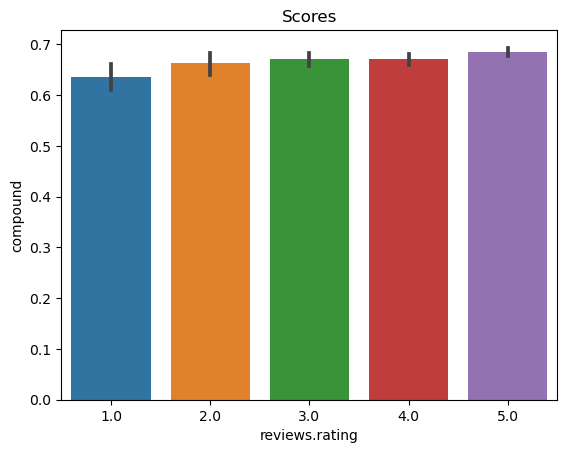

In [15]:
ax = sns.barplot(data = vaders, x = 'reviews.rating', y = 'compound')
ax.set_title ('Scores')

Text(0, 0.5, 'Polarity')

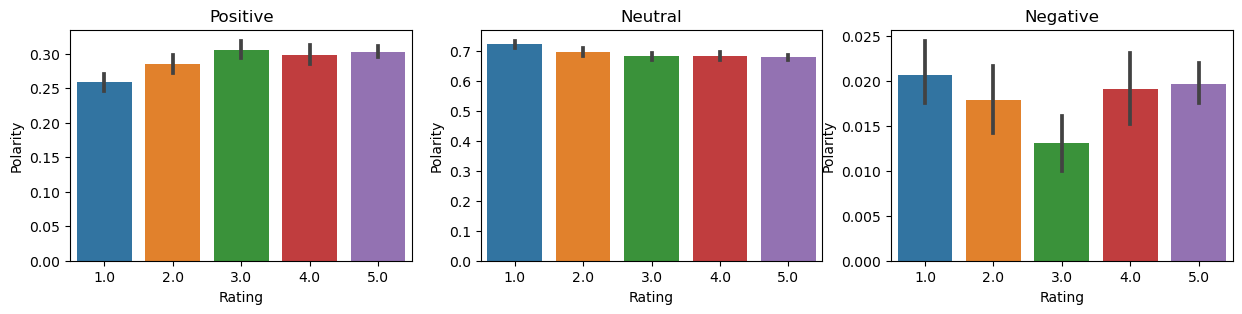

In [16]:
fig, axs = plt.subplots(1, 3, figsize = (15, 3))
sns.barplot(data = vaders, x = 'reviews.rating', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'reviews.rating', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'reviews.rating', y = 'neg', ax = axs[2])

axs[0].set_title('Positive')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Polarity')

axs[1].set_title('Neutral')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Polarity')

axs[2].set_title('Negative')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Polarity')

In [17]:
! pip install tensorflow
! pip install torch 
! pip install flax

  Using cached numpy-1.24.3-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorstore 0.1.59 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
chex 0.1.82 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
  Using cached ml_dtypes-0.4.0-cp311-cp311-macosx_10_9_universal2.whl (390 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Un

In [18]:
!pip install --upgrade tensorflow-metal
!pip install ml-dtypes==0.2.0

  Using cached ml_dtypes-0.2.0-cp311-cp311-macosx_10_9_universal2.whl (1.2 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.59 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/Users/martateodoratrales/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [21]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [22]:
res = {}
for i, row in tqdm(amazon.iterrows(), total = len(amazon)):
    try: 
        text = row['reviews.text']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}

        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both

    except RuntimeError:
        print(f'Broke for {myid}')


  0%|          | 0/2562 [00:00<?, ?it/s]

In [23]:
results_amazon = pd.DataFrame(res).T
results_amazon = results_amazon.reset_index().rename(columns = {'index' : 'id'})
results_amazon = results_amazon.merge(amazon, how = 'left')
results_amazon.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,name,asins,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,label
0,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,0.014171,0.077104,0.908725,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,2.0,http://reviews.bestbuy.com/3545/5620406/review...,Didn't have some of the features I was looking...,Wasn't for me,NaN,NaN,Mark,0
1,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,0.014171,0.077104,0.908725,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,NaN,NaN,Brandon,0
2,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,0.014171,0.077104,0.908725,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,2.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this tablet for my 4 year old daughte...,Ended up returning,NaN,NaN,Mijenx,0
3,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,0.014171,0.077104,0.908725,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,1.0,http://reviews.bestbuy.com/3545/5620406/review...,Didn't want to go to the sites amazon wanted m...,returned item,NaN,NaN,turtle,0
4,AVqkIhwDv8e3D1O-lebb,0.119,0.619,0.262,0.8242,0.014171,0.077104,0.908725,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,2.0,http://reviews.bestbuy.com/3545/5620406/review...,Not a good product short battery life i can on...,short life,NaN,NaN,notonfire1,0


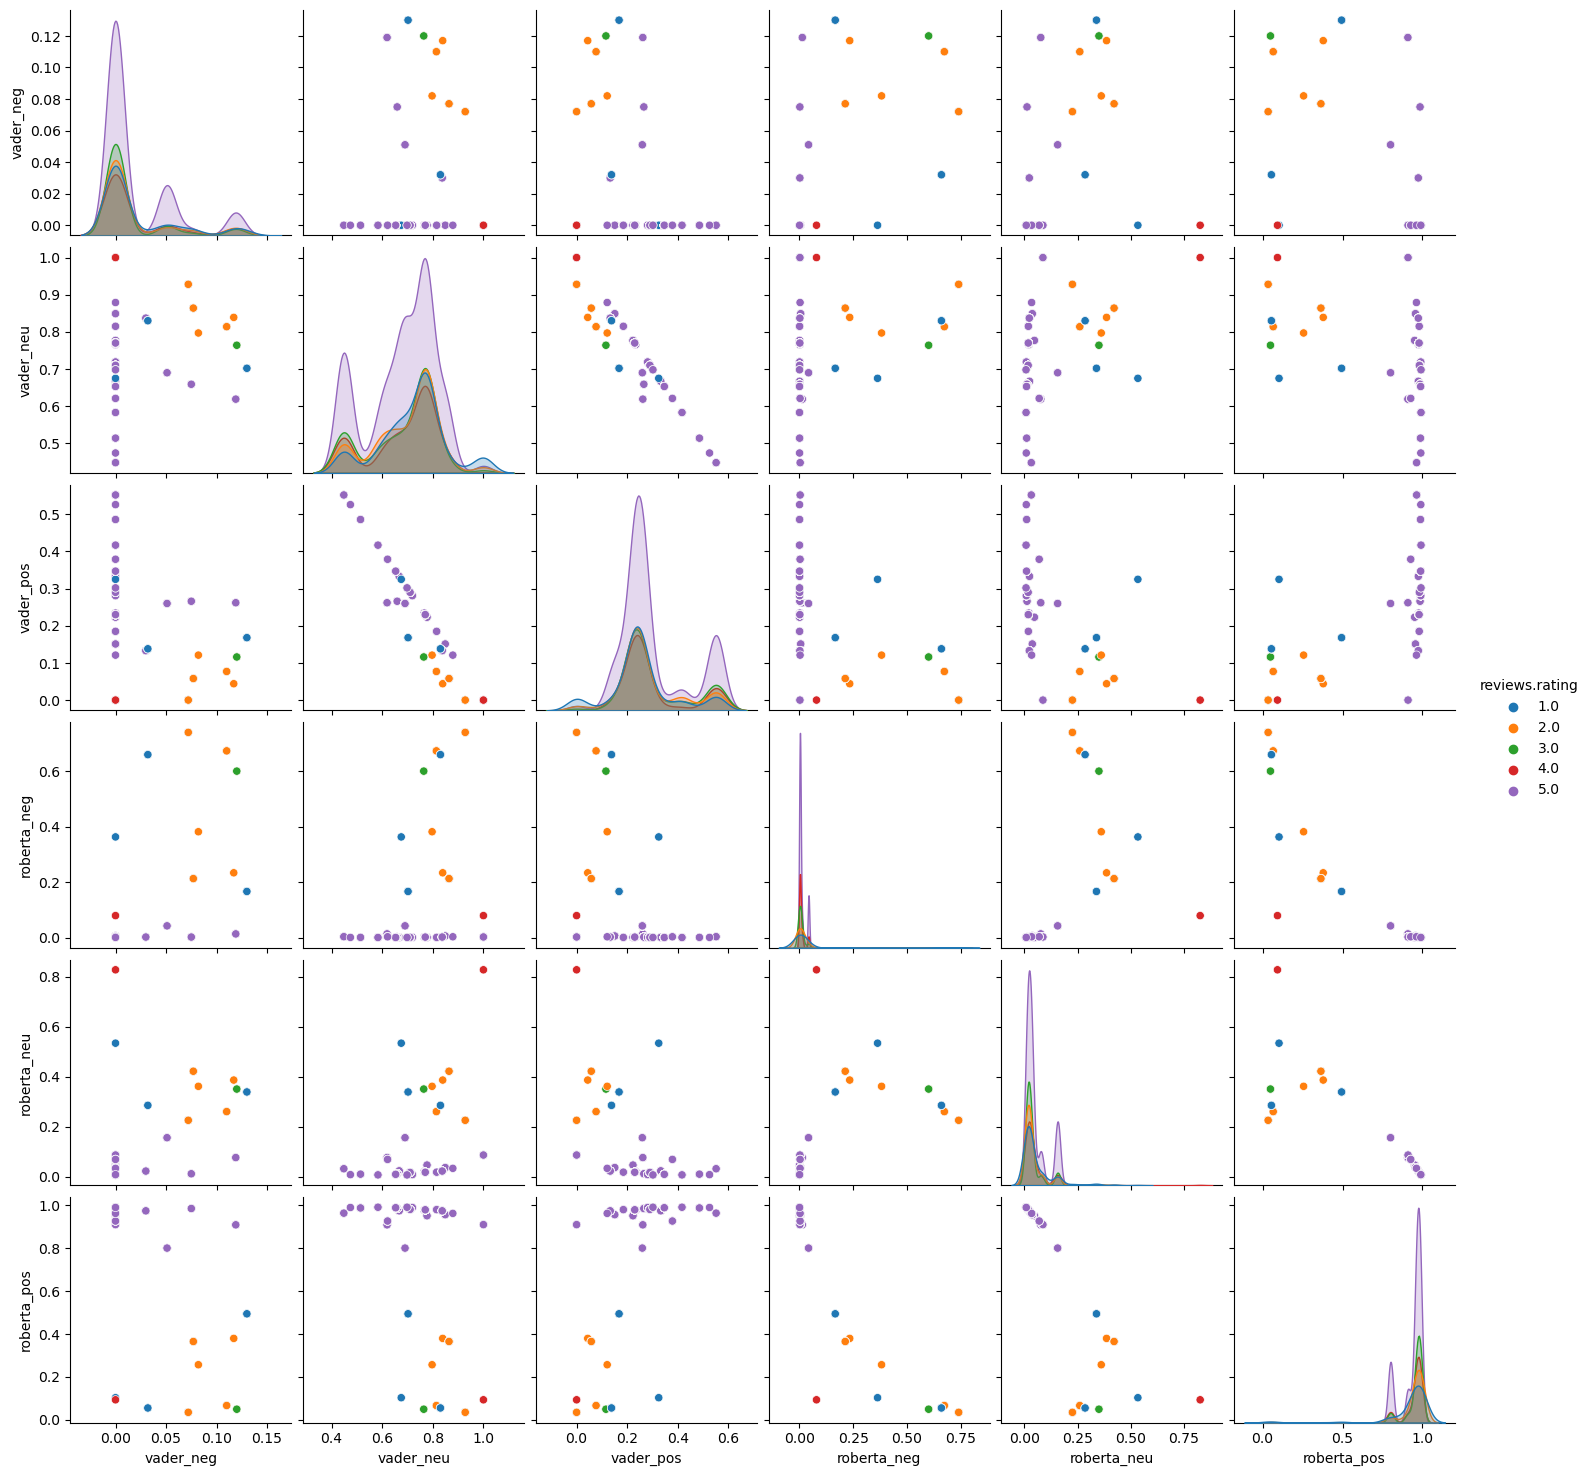

In [24]:
sns.pairplot(data = results_amazon, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg',
                                           'roberta_neu', 'roberta_pos'], hue = 'reviews.rating', palette = 'tab10')

plt.show()

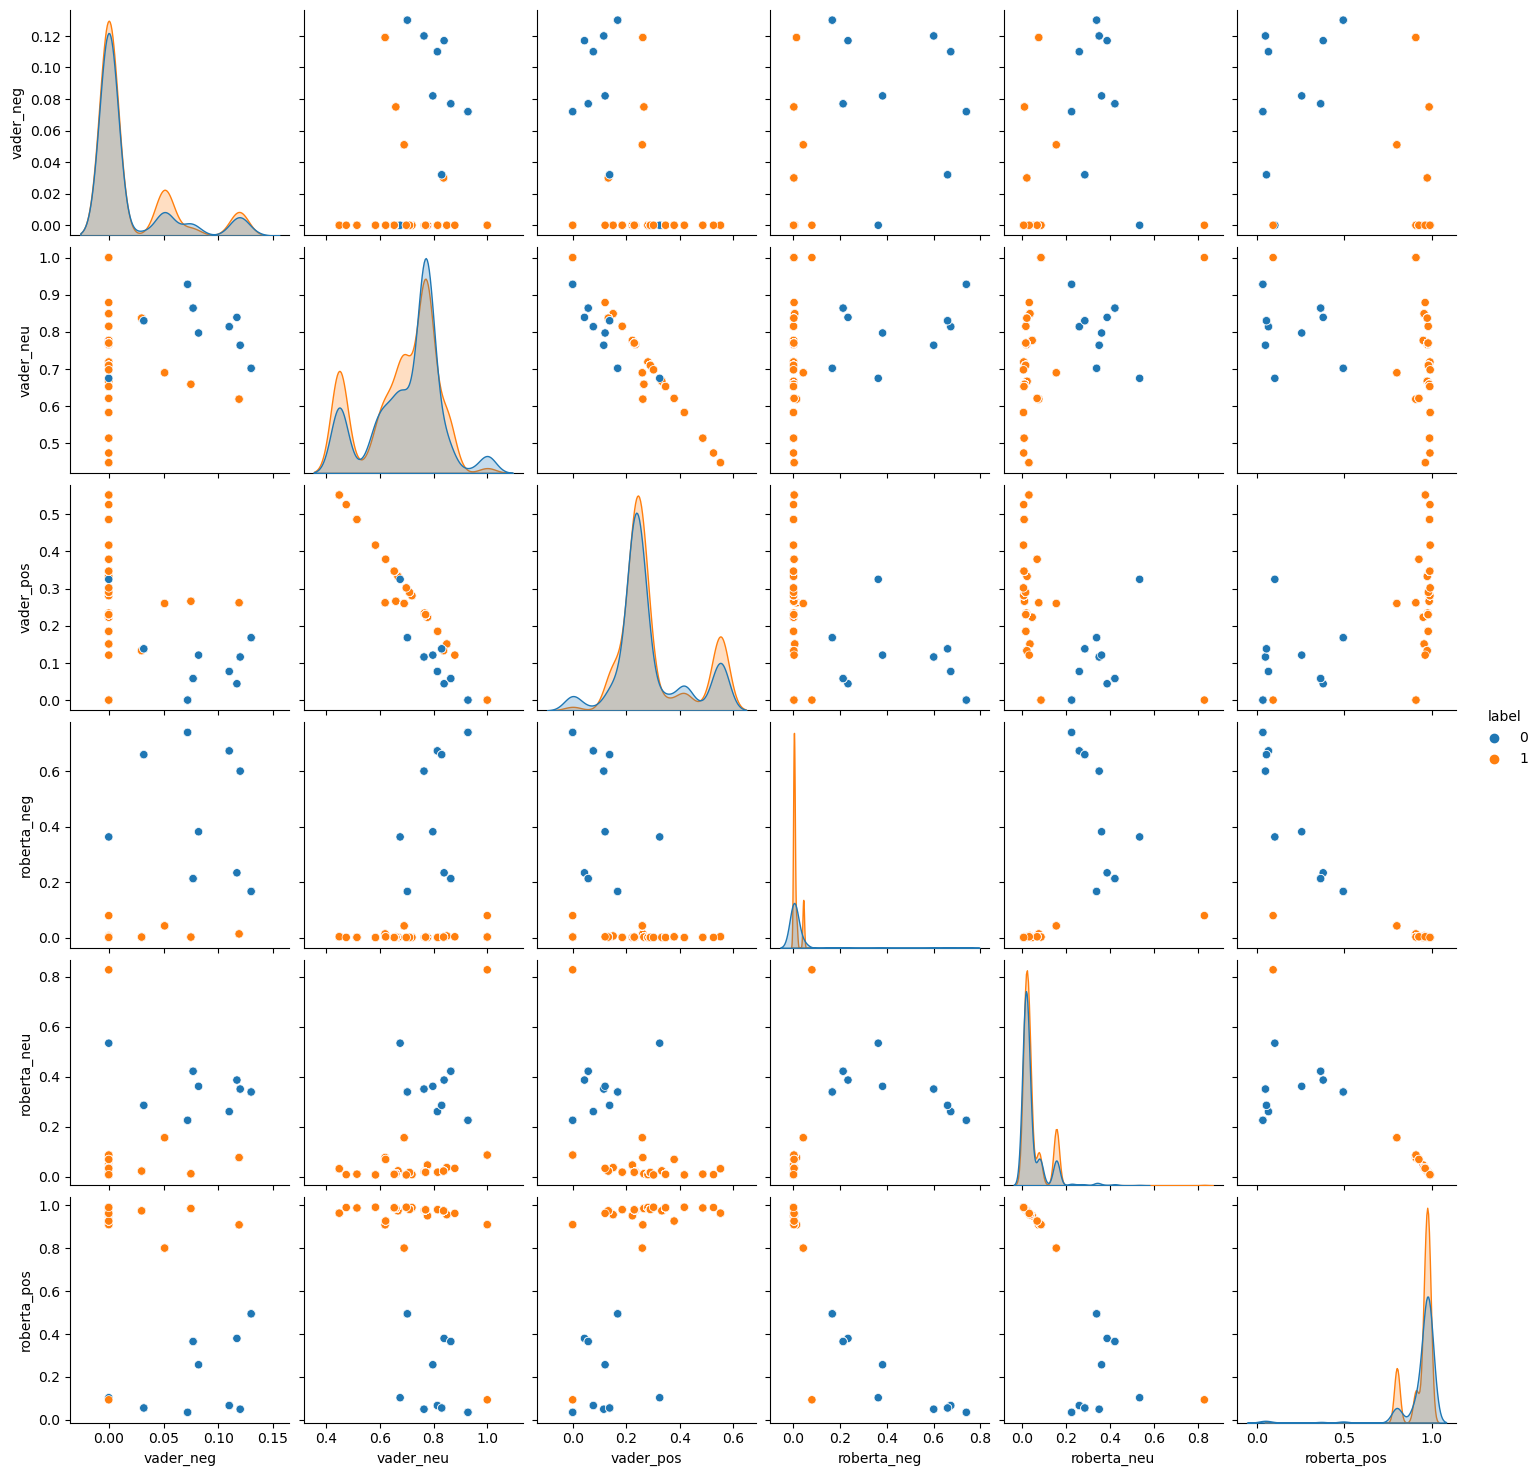

In [25]:
sns.pairplot(data = results_amazon, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg',
                                           'roberta_neu', 'roberta_pos'], hue = 'label', palette = 'tab10')

plt.show()

# Now for the whole database

In [26]:
amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")
amazon_reviews.dropna(subset = ["reviews.text"])
amazon_reviews.dropna(subset = ["reviews.title"])
amazon_reviews.dropna(subset = ["reviews.rating"])
amazon = amazon_reviews
amazon.describe()

/var/folders/k9/89sz9rmn25s78pr1yz7ytdz40000gn/T/ipykernel_90815/2256518481.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_reviews = pd.read_csv("Amazon Reviews 1.csv")


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


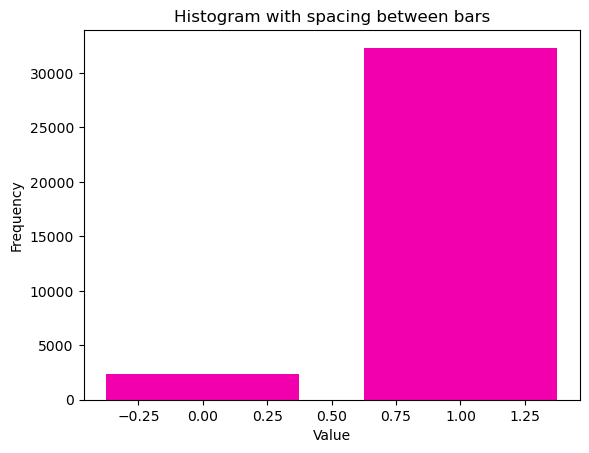

In [27]:
def label(r):
    if r >= 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)

data = amazon['label']
min_bin = - 0.5
max_bin = 1.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#f200ad')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

## Now for the model:

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [29]:
res = {}
amazon['reviews.text'] = amazon['reviews.text'].fillna('')

for i, row in tqdm(amazon.iterrows(), total = len(amazon)):
    text = row['reviews.text']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(amazon, how = 'left')
vaders

  0%|          | 0/34660 [00:00<?, ?it/s]

,id,neg,neu,pos,compound,name,asins,brand,categories,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,label
0,AVqkIhwDv8e3D1O-lebb,0.00,0.611,0.389,0.9838,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,1
1,AVqkIhwDv8e3D1O-lebb,0.00,0.611,0.389,0.9838,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,1
2,AVqkIhwDv8e3D1O-lebb,0.00,0.611,0.389,0.9838,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,1
3,AVqkIhwDv8e3D1O-lebb,0.00,0.611,0.389,0.9838,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,1
4,AVqkIhwDv8e3D1O-lebb,0.00,0.611,0.389,0.9838,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,0.13,0.702,0.168,0.7235,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,...,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris,0
34656,AVpfiBlyLJeJML43-4Tp,0.13,0.702,0.168,0.7235,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,...,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart,0
34657,AVpfiBlyLJeJML43-4Tp,0.13,0.702,0.168,0.7235,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,...,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson,0
34658,AVpfiBlyLJeJML43-4Tp,0.13,0.702,0.168,0.7235,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,...,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,NaN,NaN,Just the Buyer,0


Text(0.5, 1.0, 'Scores')

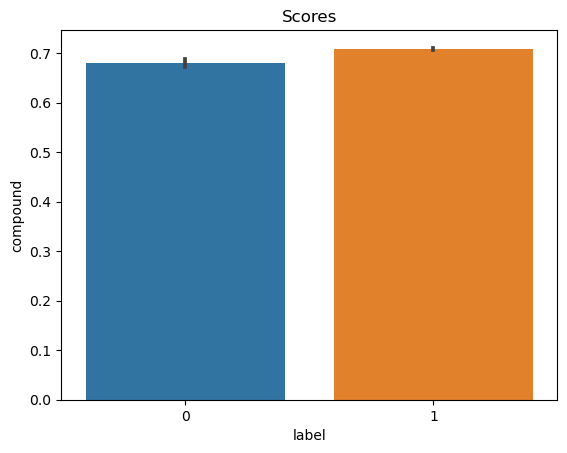

In [30]:
ax = sns.barplot(data = vaders, x = 'label', y = 'compound')
ax.set_title ('Scores')

Text(0.5, 1.0, 'Scores')

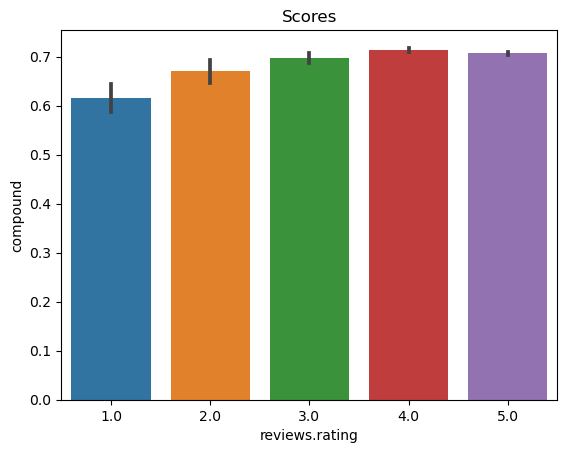

In [31]:
ax = sns.barplot(data = vaders, x = 'reviews.rating', y = 'compound')
ax.set_title ('Scores')

Text(0, 0.5, 'Polarity')

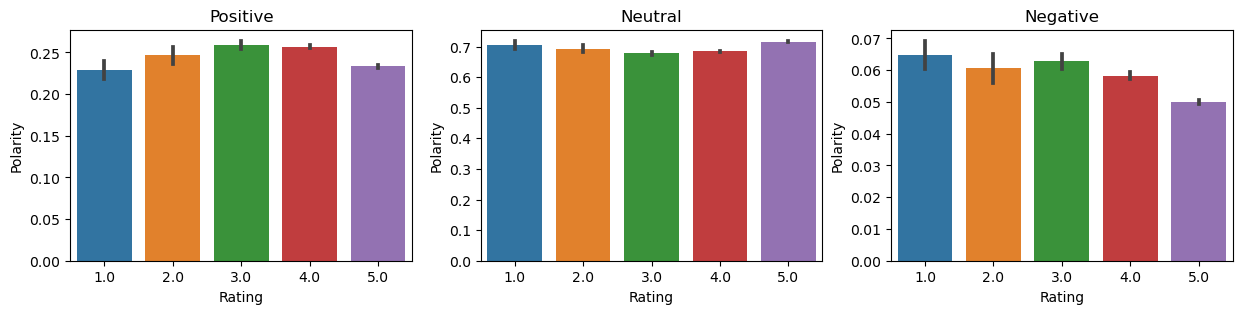

In [32]:
fig, axs = plt.subplots(1, 3, figsize = (15, 3))
sns.barplot(data = vaders, x = 'reviews.rating', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'reviews.rating', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'reviews.rating', y = 'neg', ax = axs[2])

axs[0].set_title('Positive')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Polarity')

axs[1].set_title('Neutral')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Polarity')

axs[2].set_title('Negative')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('Polarity')

In [33]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/Users/martateodoratrales/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [34]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [35]:
res = {}
amazon['reviews.text'] = amazon['reviews.text'].fillna('')
for i, row in tqdm(amazon.iterrows(), total = len(amazon)):
    try: 
        text = row['reviews.text']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}

        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both

    except RuntimeError:
        print(f'Broke for {myid}')


  0%|          | 0/34660 [00:00<?, ?it/s]

Broke for AVqVGZO3nnc1JgDc3jGK
Broke for AVqVGZO3nnc1JgDc3jGK
Broke for AVqVGZO3nnc1JgDc3jGK
Broke for AVpfBEWcilAPnD_xTGb7
Broke for AVqkIiKWnnc1JgDc3khH
Broke for AVphgVaX1cnluZ0-DR74
Broke for AVphgVaX1cnluZ0-DR74
Broke for AVphgVaX1cnluZ0-DR74
Broke for AV1YnRtnglJLPUi8IJmV
Broke for AVphPmHuilAPnD_x3E5h
Broke for AVpe7AsMilAPnD_xQ78G
Broke for AVpfl8cLLJeJML43AE3S
Broke for AVpfl8cLLJeJML43AE3S
Broke for AVpfpK8KLJeJML43BCuD
Broke for AV1YE_muvKc47QAVgpwE
Broke for AV1YE_muvKc47QAVgpwE


In [36]:
results_amazon = pd.DataFrame(res).T
results_amazon = results_amazon.reset_index().rename(columns = {'index' : 'id'})
results_amazon = results_amazon.merge(amazon, how = 'left')
results_amazon.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,name,asins,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,label
0,AVqkIhwDv8e3D1O-lebb,0.0,0.611,0.389,0.9838,0.002046,0.008618,0.989336,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,1
1,AVqkIhwDv8e3D1O-lebb,0.0,0.611,0.389,0.9838,0.002046,0.008618,0.989336,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,1
2,AVqkIhwDv8e3D1O-lebb,0.0,0.611,0.389,0.9838,0.002046,0.008618,0.989336,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,1
3,AVqkIhwDv8e3D1O-lebb,0.0,0.611,0.389,0.9838,0.002046,0.008618,0.989336,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,1
4,AVqkIhwDv8e3D1O-lebb,0.0,0.611,0.389,0.9838,0.002046,0.008618,0.989336,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,1


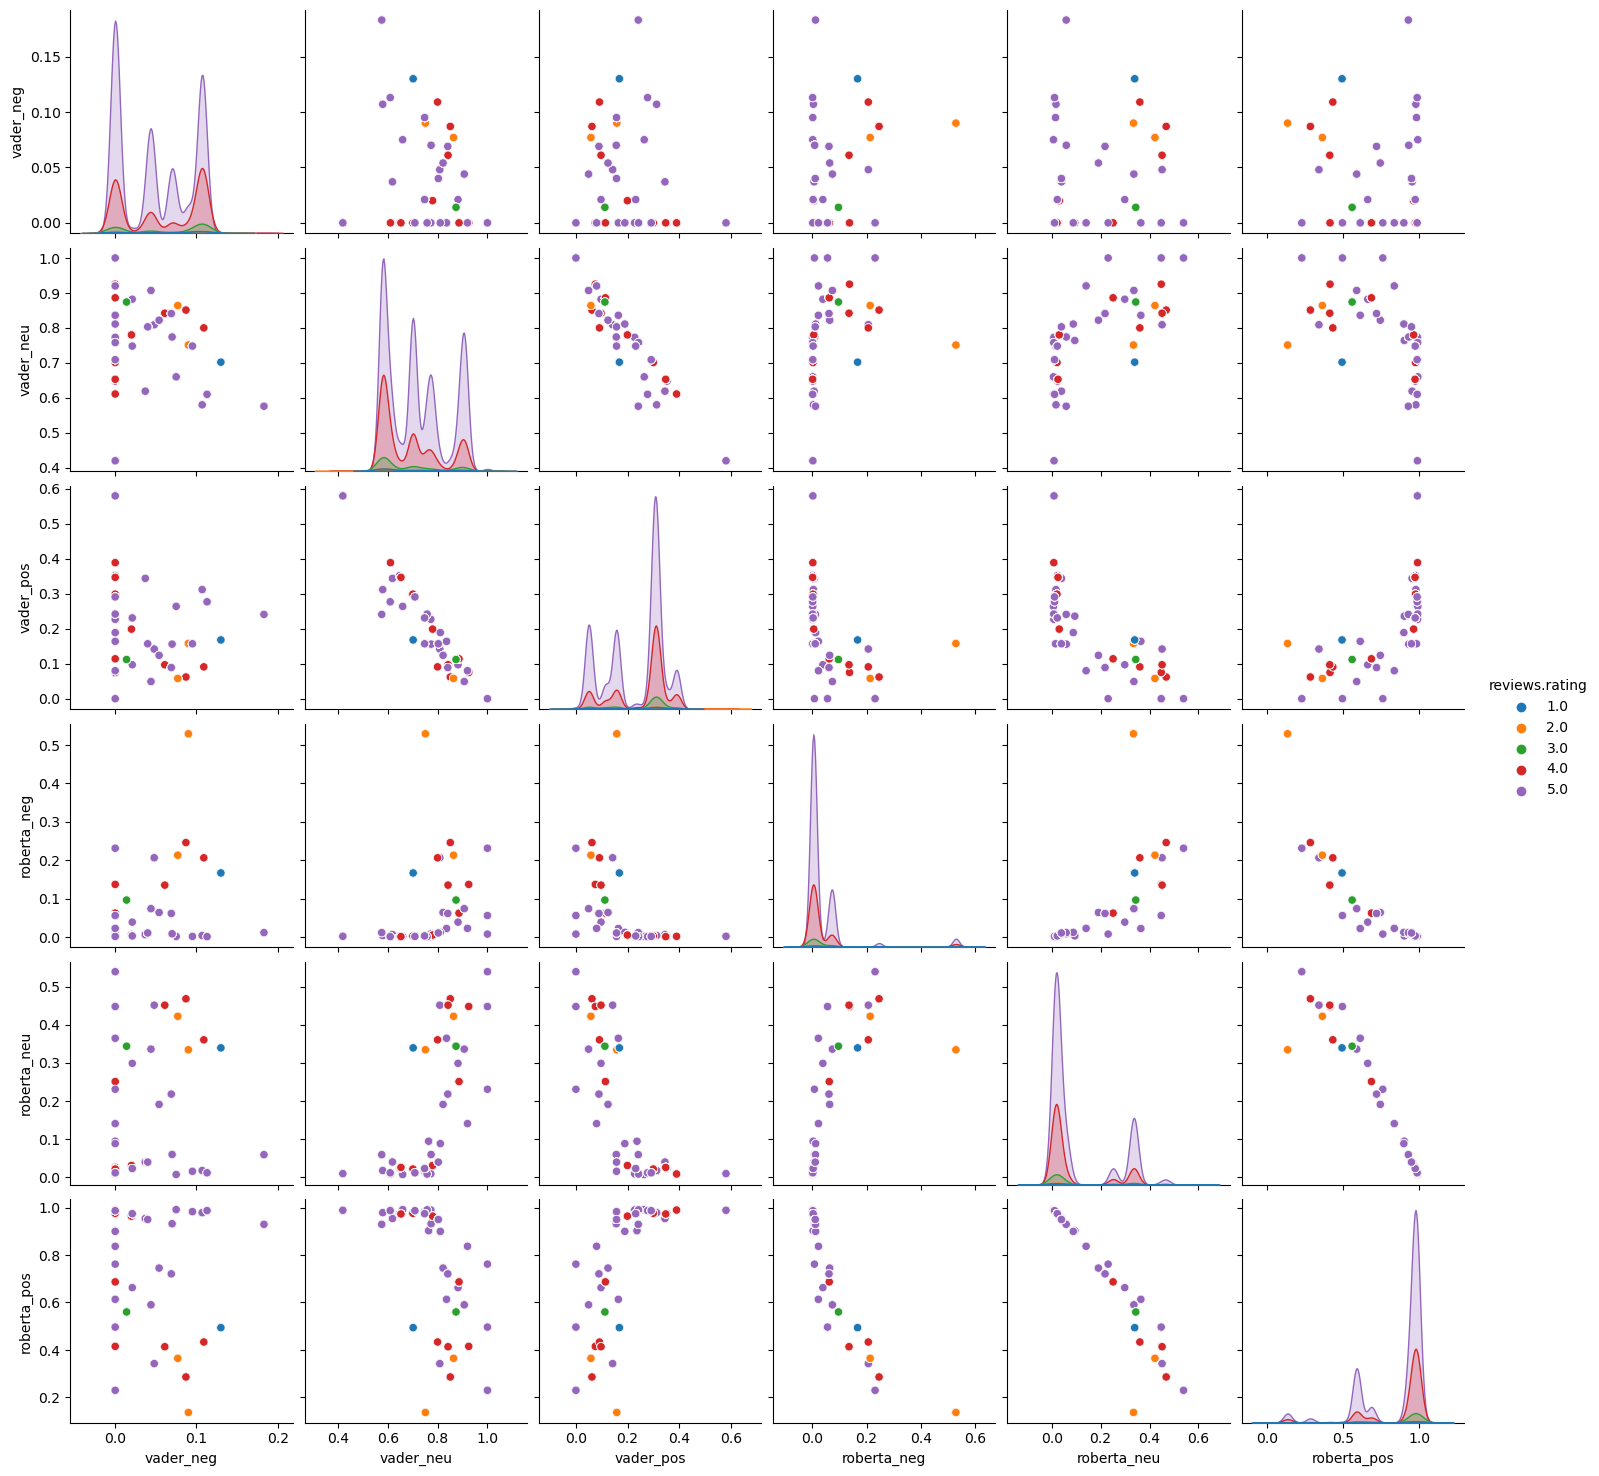

In [37]:
sns.pairplot(data = results_amazon, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg',
                                           'roberta_neu', 'roberta_pos'], hue = 'reviews.rating', palette = 'tab10')

plt.show()

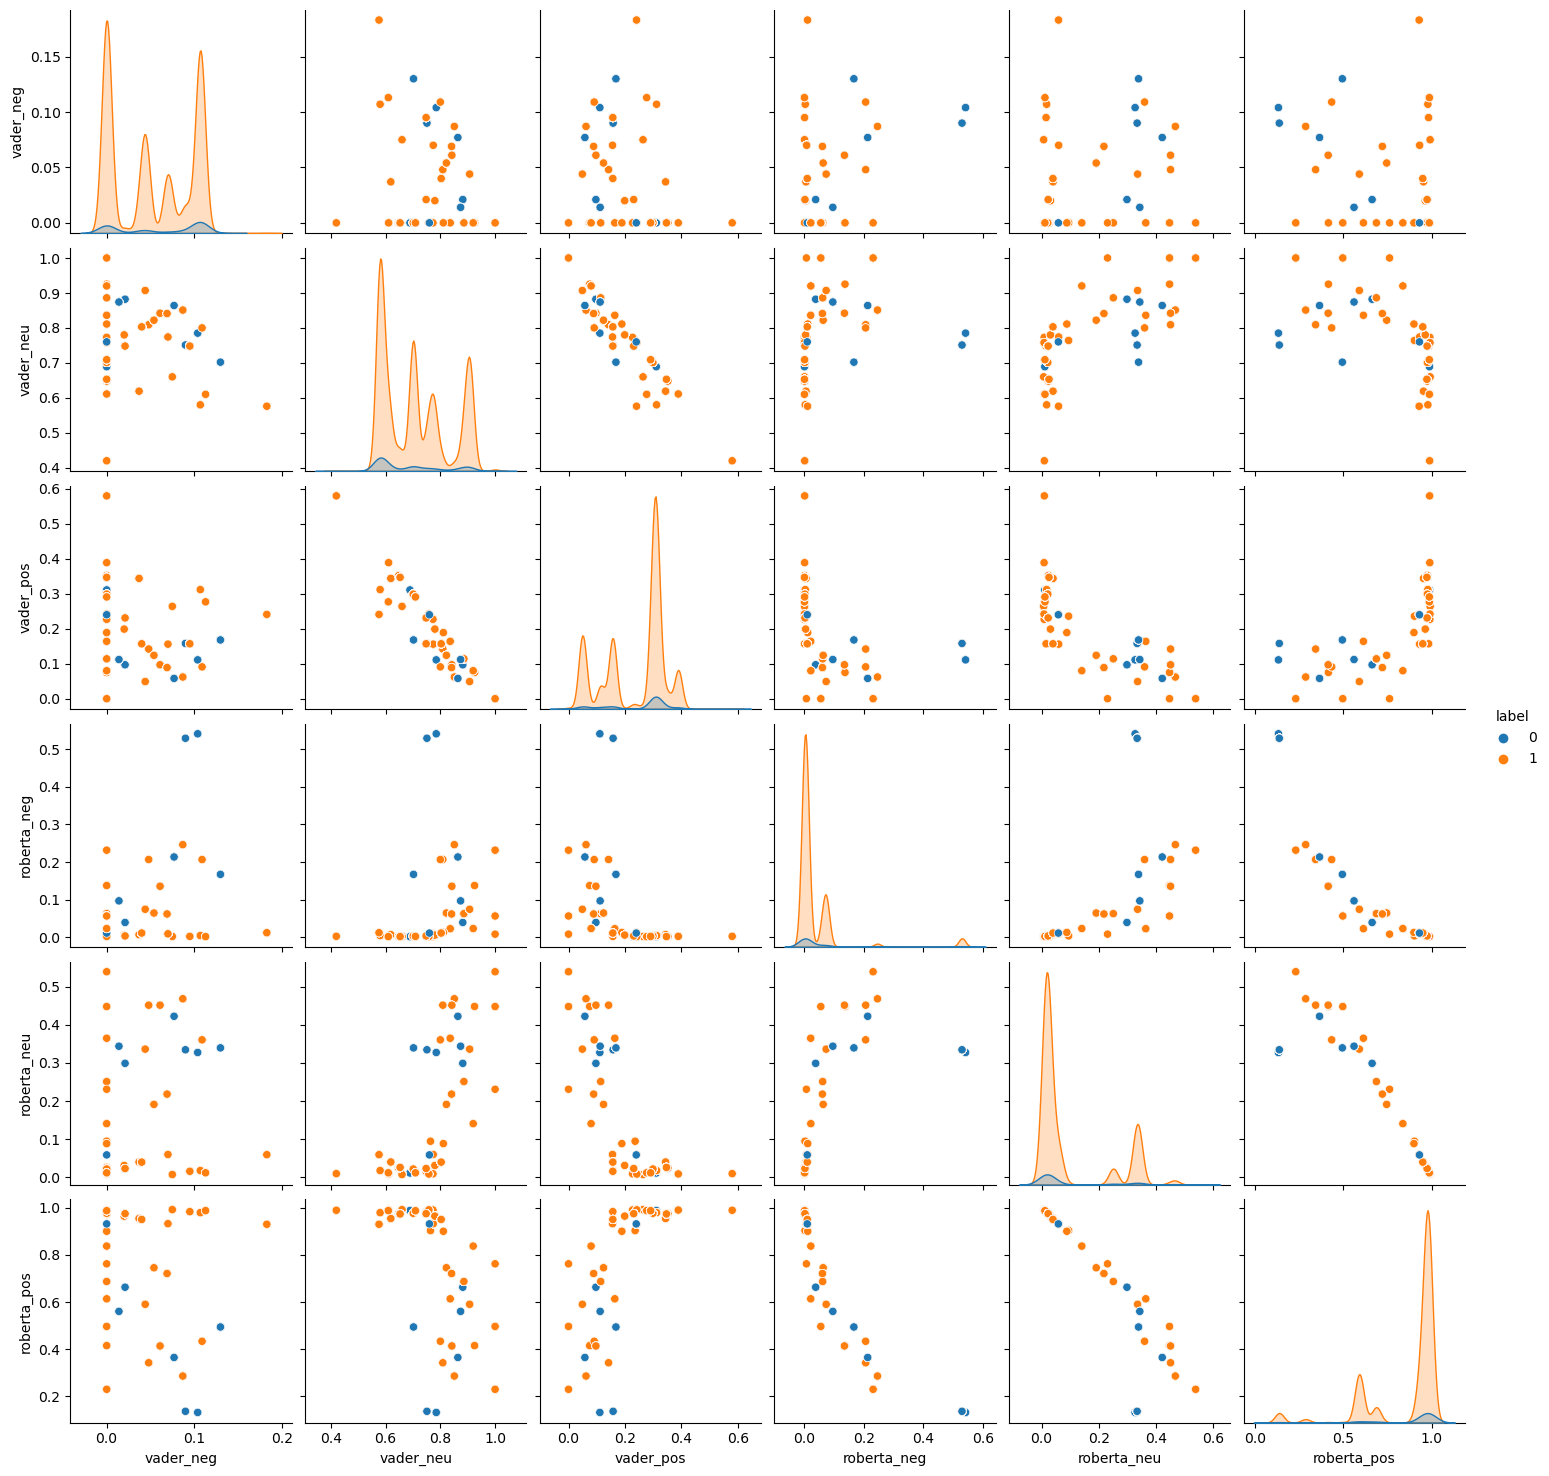

In [38]:
sns.pairplot(data = results_amazon, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg',
                                           'roberta_neu', 'roberta_pos'], hue = 'label', palette = 'tab10')

plt.show()